In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv

In [2]:
def Phi(phi, M):
    Phi = []
    for m in range(M):
        Phi.append((1/np.sqrt(2*np.pi)) * np.exp(1j * m * phi))
    return Phi

def N_n(n, m, a):
    k = n**2+m
    return a**2 / 2 * jv(m+1, k*a)**2
    
def R(r, M, N, a):
    R = []
    for n in range(1,N+1):
        ns = []
        for m in range(M):
            k = n**2+m
            ns.append(1 / np.sqrt(N_n(n,m,a)) * jv(m, k*r))
        R.append(ns)
    return R

In [3]:
M = 5
N = 4
a=1

phis = np.linspace(0,2*np.pi, 360)
radii = np.linspace(0,a,100)

phi_basis = []
for phi in phis:
    phi_basis.append(Phi(phi, M))

radii_basis = []
for r in radii:
    radii_basis.append(R(r, M, N, a))

phi_basis = np.array(phi_basis)
radii_basis = np.array(radii_basis)

In [48]:
def Psi_basis(m, theta):
    if m == 0:
        return np.array([1/np.sqrt(2*np.pi)] * theta.shape[0]).reshape(1,360)
    else:
        return np.array([
            np.cos(m*theta) / np.sqrt(np.pi),
            np.sin(m*theta) / np.sqrt(np.pi)
        ])

def Psi(n, m, a, r, phi):
    k = n**2+m
    N = a**2 / 2 * jv(m+1, k*a)**2
    R = 1 / np.sqrt(N) * jv(m, k*r)
    #Phi = 1 / np.sqrt(2*np.pi) * np.exp(1j * m * phi)
    Phi = Psi_basis(m, phi)
    if m == 0:
        return R.reshape(100,1) @ Phi[0].reshape(1,360)
    else:
        return R.reshape(100,1) @ Phi[0].reshape(1,360), R.reshape(100,1) @ Phi[1].reshape(1,360)

basis = []
for n in range(1,N+1):
    b = list()
    for m in range(M):
        b.extend(Psi(n,m,a,radii,phis))
    print(b)
    basis.append(b)
basis = np.array(basis)
print(basis.shape)

[array([1.28210165, 1.28210165, 1.28210165, 1.28210165, 1.28210165,
       1.28210165, 1.28210165, 1.28210165, 1.28210165, 1.28210165,
       1.28210165, 1.28210165, 1.28210165, 1.28210165, 1.28210165,
       1.28210165, 1.28210165, 1.28210165, 1.28210165, 1.28210165,
       1.28210165, 1.28210165, 1.28210165, 1.28210165, 1.28210165,
       1.28210165, 1.28210165, 1.28210165, 1.28210165, 1.28210165,
       1.28210165, 1.28210165, 1.28210165, 1.28210165, 1.28210165,
       1.28210165, 1.28210165, 1.28210165, 1.28210165, 1.28210165,
       1.28210165, 1.28210165, 1.28210165, 1.28210165, 1.28210165,
       1.28210165, 1.28210165, 1.28210165, 1.28210165, 1.28210165,
       1.28210165, 1.28210165, 1.28210165, 1.28210165, 1.28210165,
       1.28210165, 1.28210165, 1.28210165, 1.28210165, 1.28210165,
       1.28210165, 1.28210165, 1.28210165, 1.28210165, 1.28210165,
       1.28210165, 1.28210165, 1.28210165, 1.28210165, 1.28210165,
       1.28210165, 1.28210165, 1.28210165, 1.28210165, 1.2821

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (4, 108) + inhomogeneous part.

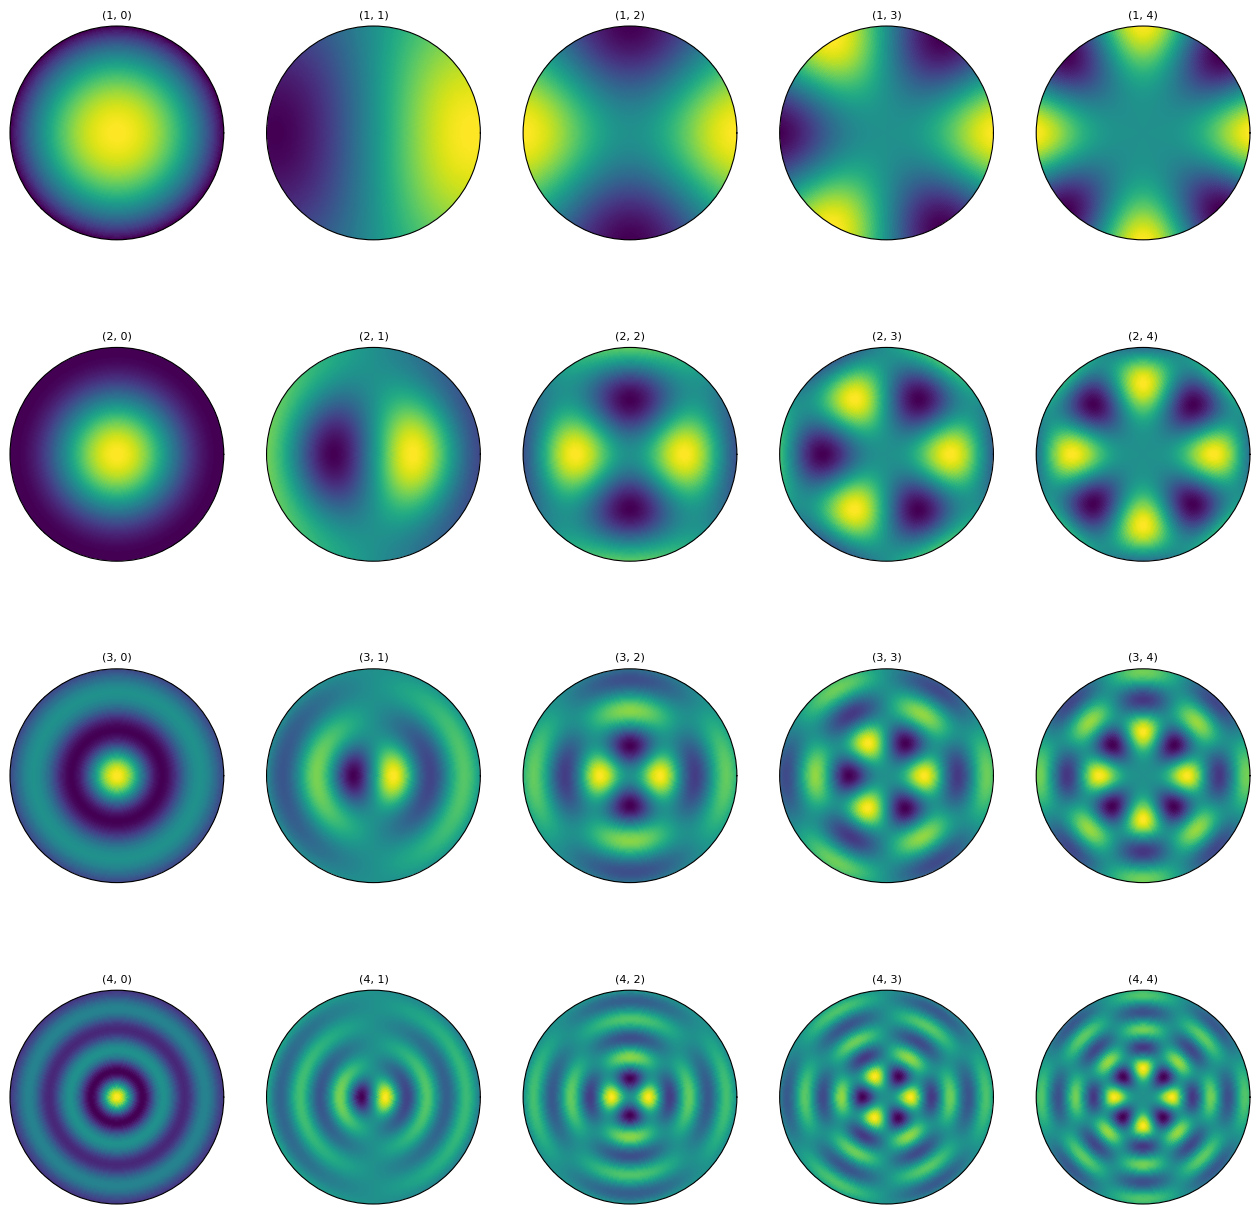

In [15]:
fig, ax = plt.subplots(ncols=M, nrows=N, subplot_kw={'projection': 'polar'}, figsize=(16,16))
for n in range(N):
    for m in range(M):
        #psi = radii_basis[:,n,m].reshape(100,1) @ phi_basis[:,m].reshape(1,360)
        
        ax[n][m].pcolormesh(phis,radii,basis[n,m].real)
        ax[n][m].grid(False)
        ax[n][m].set_yticklabels([])
        ax[n][m].set_xticklabels([])
        ax[n][m].set_title(f"({n+1}, {m})", fontsize=8)
plt.show()

In [18]:
print(radii_basis.shape)
print(phi_basis.shape)
print(basis.shape)

(100, 4, 5)
(360, 5)
(4, 5, 100, 360)


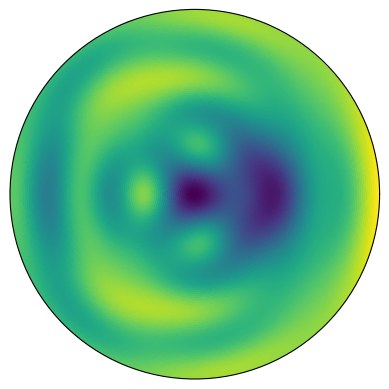

In [23]:
coeffs = np.random.uniform(-1,1,size=(1, N, M))
f = np.einsum("inm,nmt->t", coeffs, basis.reshape(N,M,-1))

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.pcolormesh(phis,radii,f.real.reshape(100,360))
ax.grid(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

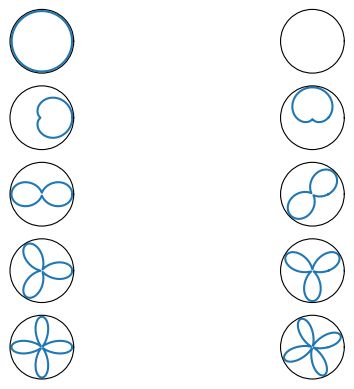

In [33]:
def Psi_basis(m, theta):
    if m == 0:
        return np.array([1/np.sqrt(2*np.pi)] * theta.shape[0]).reshape(1,360)
    else:
        return np.array([
            np.cos(m*theta) / np.sqrt(np.pi),
            np.sin(m*theta) / np.sqrt(np.pi)
        ])

fig, ax = plt.subplots(nrows=M, ncols=2, subplot_kw={'projection': 'polar'})
for m in range(M):
    psi_basis = Psi_basis(m, phis)
    ax[m][0].plot(phis, psi_basis[0])
    if m > 0:
        ax[m][1].plot(phis, psi_basis[1])
    #ax[n][m].pcolormesh(phis,radii,basis[n,m].real)
    ax[m][0].grid(False)
    ax[m][0].set_yticklabels([])
    ax[m][0].set_xticklabels([])
    ax[m][1].grid(False)
    ax[m][1].set_yticklabels([])
    ax[m][1].set_xticklabels([])
plt.show()

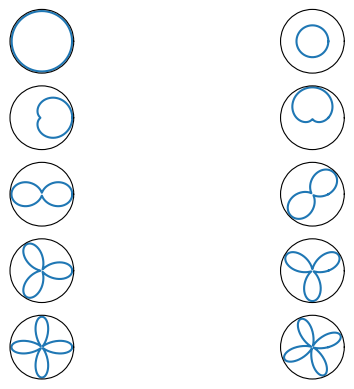

In [40]:
fig, ax = plt.subplots(nrows=M, ncols=2, subplot_kw={'projection': 'polar'})
for m in range(M):
    psi_basis = (1/np.sqrt(2*np.pi)) * np.exp(1j * m * phis)
    ax[m][0].plot(phis, psi_basis.real)
    ax[m][1].plot(phis, psi_basis.imag)
    ax[m][0].grid(False)
    ax[m][0].set_yticklabels([])
    ax[m][0].set_xticklabels([])
    ax[m][1].grid(False)
    ax[m][1].set_yticklabels([])
    ax[m][1].set_xticklabels([])
plt.show()